# Filter Magnitudes of the Sun

In [2]:
from spice.models import IcosphereModel
from spice.spectrum import simulate_observed_flux
from spice.spectrum.spectrum import simulate_monochromatic_luminosity
import astropy.units as u
import jax.numpy as jnp
import numpy as np
from transformer_payne import Blackbody
import matplotlib.pyplot as plt
%matplotlib inline

from jax import config
config.update('jax_platform_name', 'cpu')
config.update('jax_enable_x64', True)

Let's use a simple, blackbody model just for the testing purposes, alogside with a solar-like model.

In [3]:
bb = Blackbody()
model = IcosphereModel.construct(10000, 1., 1., [5777.], bb.parameter_names)

/Users/mjablons/Documents/stellar-mesh-integration/src/spice/models/mesh_model.py:251: UserWarning: If override_log_g is True, either parameter_names must include one of [logg,loggs,log_g,log_gs,log g,log gs,surface gravity,surface gravities,surface_gravity,surface_gravities], or log_g_index must be passed for log g to be used in the spectrum emulator.
  warnings.warn(f"If override_log_g is True, either parameter_names must include one of [" + ",".join(


Text(0, 0.5, 'Flux')

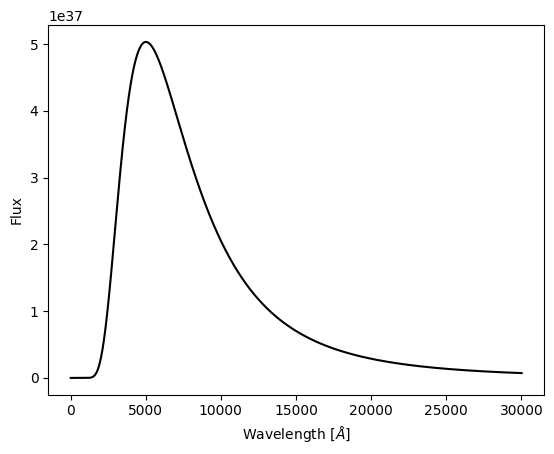

In [8]:
mono_luminosity = simulate_monochromatic_luminosity(bb.flux, model, jnp.log10(vws), chunk_size=1000)
plt.plot(vws, mono_luminosity[:, 0], color='black')
plt.gca().set_xlabel('Wavelength [$\\AA$]')
plt.gca().set_ylabel('Flux')

# Filters

Let's use the ```Filter``` subclasses to check the passband luminosities.

In [9]:
from spice.spectrum.filter import JohnsonCousinsB, JohnsonCousinsI, GaiaG, JohnsonCousinsV, GaiaRP, GaiaBP, TWOMASSJ, TWOMASSH, TWOMASSK

jc_b = JohnsonCousinsB()
jc_i = JohnsonCousinsI()
gaia_g = GaiaG()
gaia_rp = GaiaRP()
gaia_bp = GaiaBP()
jc_v = JohnsonCousinsV()

twomass_j = TWOMASSJ()
twomass_h = TWOMASSH()
twomass_k = TWOMASSK()

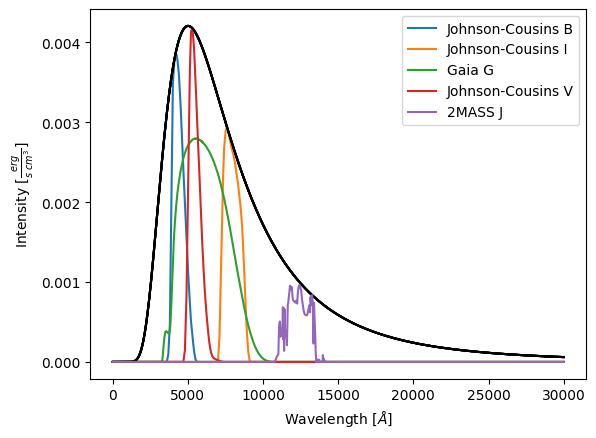

In [18]:
jc_b.plot_filter_responses_for_wavelengths(vws, observed_flux[:, 0])
jc_i.plot_filter_responses_for_wavelengths(vws, observed_flux[:, 0])
gaia_g.plot_filter_responses_for_wavelengths(vws, observed_flux[:, 0])
jc_v.plot_filter_responses_for_wavelengths(vws, observed_flux[:, 0])
twomass_j.plot_filter_responses_for_wavelengths(vws, observed_flux[:, 0])

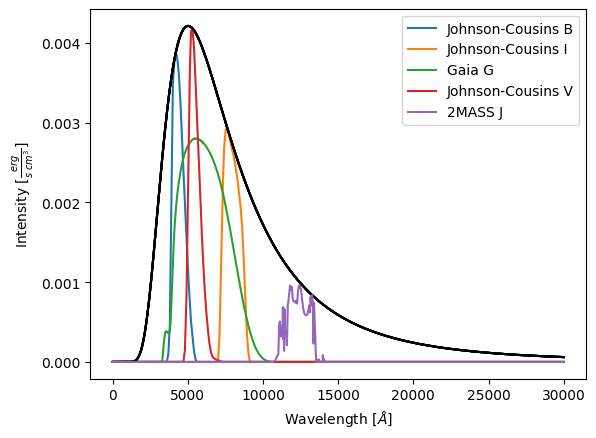

In [11]:
jc_b.plot_filter_responses_for_wavelengths(bb_wavelengths, bb_fluxes*5.08659e-10)
jc_i.plot_filter_responses_for_wavelengths(bb_wavelengths, bb_fluxes*5.08659e-10)
gaia_g.plot_filter_responses_for_wavelengths(bb_wavelengths, bb_fluxes*5.08659e-10)
jc_v.plot_filter_responses_for_wavelengths(bb_wavelengths, bb_fluxes*5.08659e-10)
twomass_j.plot_filter_responses_for_wavelengths(bb_wavelengths, bb_fluxes*5.08659e-10)


The passband luminosities can be calculated using the ```AB_passband_luminosity``` function.

In [12]:
from spice.spectrum.spectrum import AB_passband_luminosity
C: float = 299792.458  # km/s

In [13]:
from spice.spectrum.spectrum import Vega_passband_luminosity


solar_apparent_mag_B = AB_passband_luminosity(jc_b, vws, observed_flux[:, 0])
solar_apparent_mag_I = AB_passband_luminosity(jc_i, vws, observed_flux[:, 0])
solar_apparent_mag_G = AB_passband_luminosity(gaia_g, vws, observed_flux[:, 0])
solar_johnson_v = AB_passband_luminosity(jc_v, vws, observed_flux[:, 0])

solar_apparent_mag_G_Vega = Vega_passband_luminosity(gaia_g, vws, observed_flux[:, 0])
solar_apparent_mag_RP_Vega = Vega_passband_luminosity(gaia_rp, vws, observed_flux[:, 0])
solar_apparent_mag_BP_Vega = Vega_passband_luminosity(gaia_bp, vws, observed_flux[:, 0])

solar_apparent_mag_J = Vega_passband_luminosity(twomass_j, vws, observed_flux[:, 0])
solar_apparent_mag_H = Vega_passband_luminosity(twomass_h, vws, observed_flux[:, 0])
solar_apparent_mag_K = Vega_passband_luminosity(twomass_k, vws, observed_flux[:, 0])

print("Apparent magnitude of the Sun")
print("Bessel B:\t", solar_apparent_mag_B, "mag")
print("Bessel I:\t", solar_apparent_mag_I, "mag")
print("Gaia G:\t\t", solar_apparent_mag_G, "mag")

print("Gaia G (Vega):\t", solar_apparent_mag_G_Vega, "mag")
print("Gaia RP (Vega):\t", solar_apparent_mag_RP_Vega, "mag")
print("Gaia BP (Vega):\t", solar_apparent_mag_BP_Vega, "mag")

print("2MASS J:\t", solar_apparent_mag_J, "mag")
print("2MASS H:\t", solar_apparent_mag_H, "mag")
print("2MASS K:\t", solar_apparent_mag_K, "mag")    

print("Johnson V:\t", solar_johnson_v, "mag")

Apparent magnitude of the Sun
Bessel B:	 5.520799481222488 mag
Bessel I:	 4.100772979959774 mag
Gaia G:		 4.812117745298249 mag
Gaia G (Vega):	 4.698439967898249 mag
Gaia RP (Vega):	 4.177787355118917 mag
Gaia BP (Vega):	 5.044957125958061 mag
2MASS J:	 3.7217060351440048 mag
2MASS H:	 3.5317535816577155 mag
2MASS K:	 3.382647306817892 mag
Johnson V:	 4.887531123698491 mag


In [14]:
solar_apparent_mag_B = AB_passband_luminosity(jc_b, bb_wavelengths, bb_fluxes*5.08659e-10)
solar_apparent_mag_I = AB_passband_luminosity(jc_i, bb_wavelengths, bb_fluxes*5.08659e-10)
solar_apparent_mag_G = AB_passband_luminosity(gaia_g, bb_wavelengths, bb_fluxes*5.08659e-10)
solar_johnson_v = AB_passband_luminosity(jc_v, bb_wavelengths, bb_fluxes*5.08659e-10)

solar_apparent_mag_G_Vega = Vega_passband_luminosity(gaia_g, bb_wavelengths, bb_fluxes*5.08659e-10)
solar_apparent_mag_RP_Vega = Vega_passband_luminosity(gaia_rp, bb_wavelengths, bb_fluxes*5.08659e-10)
solar_apparent_mag_BP_Vega = Vega_passband_luminosity(gaia_bp, bb_wavelengths, bb_fluxes*5.08659e-10)

solar_apparent_mag_J = Vega_passband_luminosity(twomass_j, bb_wavelengths, bb_fluxes*5.08659e-10)
solar_apparent_mag_H = Vega_passband_luminosity(twomass_h, bb_wavelengths, bb_fluxes*5.08659e-10)
solar_apparent_mag_K = Vega_passband_luminosity(twomass_k, bb_wavelengths, bb_fluxes*5.08659e-10)

print("Apparent magnitude of the Sun")
print("Bessel B:\t", solar_apparent_mag_B, "mag")
print("Bessel I:\t", solar_apparent_mag_I, "mag")
print("Gaia G:\t\t", solar_apparent_mag_G, "mag")

print("Gaia G (Vega):\t", solar_apparent_mag_G_Vega, "mag")
print("Gaia RP (Vega):\t", solar_apparent_mag_RP_Vega, "mag")
print("Gaia BP (Vega):\t", solar_apparent_mag_BP_Vega, "mag")

print("2MASS J:\t", solar_apparent_mag_J, "mag")
print("2MASS H:\t", solar_apparent_mag_H, "mag")
print("2MASS K:\t", solar_apparent_mag_K, "mag")    

print("Johnson V:\t", solar_johnson_v, "mag")

Apparent magnitude of the Sun
Bessel B:	 5.519708336124764 mag
Bessel I:	 4.099696616685841 mag
Gaia G:		 4.811036084752803 mag
Gaia G (Vega):	 4.697358307352803 mag
Gaia RP (Vega):	 4.176710268304705 mag
Gaia BP (Vega):	 5.043871084703397 mag
2MASS J:	 3.7206354173960063 mag
2MASS H:	 3.5306854300336474 mag
2MASS K:	 3.381580722047225 mag
Johnson V:	 4.886446645733011 mag
